#Dimensionality Reduction and Hyperparameter tuning.

In this colab we are going to perform dimensionality reduction on the digits data set from the sckit learn and perform hyperparameter tuning and visualize before and after umap reduction.

##1. Import necessary libraries and load the dataset:

In [2]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 2.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.9 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=9b7f342c06a81c7e3c642a1da6b930a8e00eff01b7385bb8083954c42f6346e4
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


In [3]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
import umap

# Load dataset
digits = load_digits()
data = digits.data
target = digits.target


#2. Visualize a few samples from the dataset:

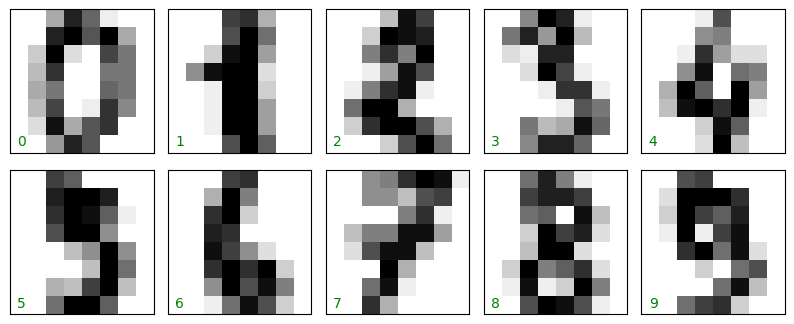

In [4]:
# Plot some samples
fig, axes = plt.subplots(2, 5, figsize=(10, 4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]), transform=ax.transAxes, color='green')
plt.show()


#3. Apply UMAP for Dimensionality Reduction:

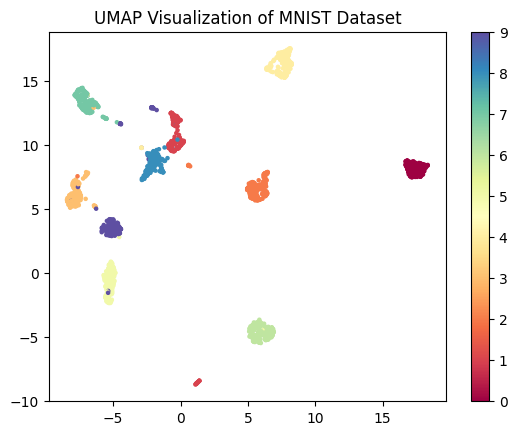

In [5]:
# UMAP dimensionality reduction
reducer = umap.UMAP()
embedding = reducer.fit_transform(data)

# Plotting the UMAP visualization
plt.scatter(embedding[:, 0], embedding[:, 1], c=target, cmap='Spectral', s=5)
plt.title('UMAP Visualization of MNIST Dataset')
plt.colorbar()
plt.show()


Exception ignored in: <function WeakValueDictionary.__init__.<locals>.remove at 0x7f801b7dd480>
Traceback (most recent call last):
  File "/usr/lib/python3.10/weakref.py", line 106, in remove
    def remove(wr, selfref=ref(self), _atomic_removal=_remove_dead_weakref):
KeyboardInterrupt: 


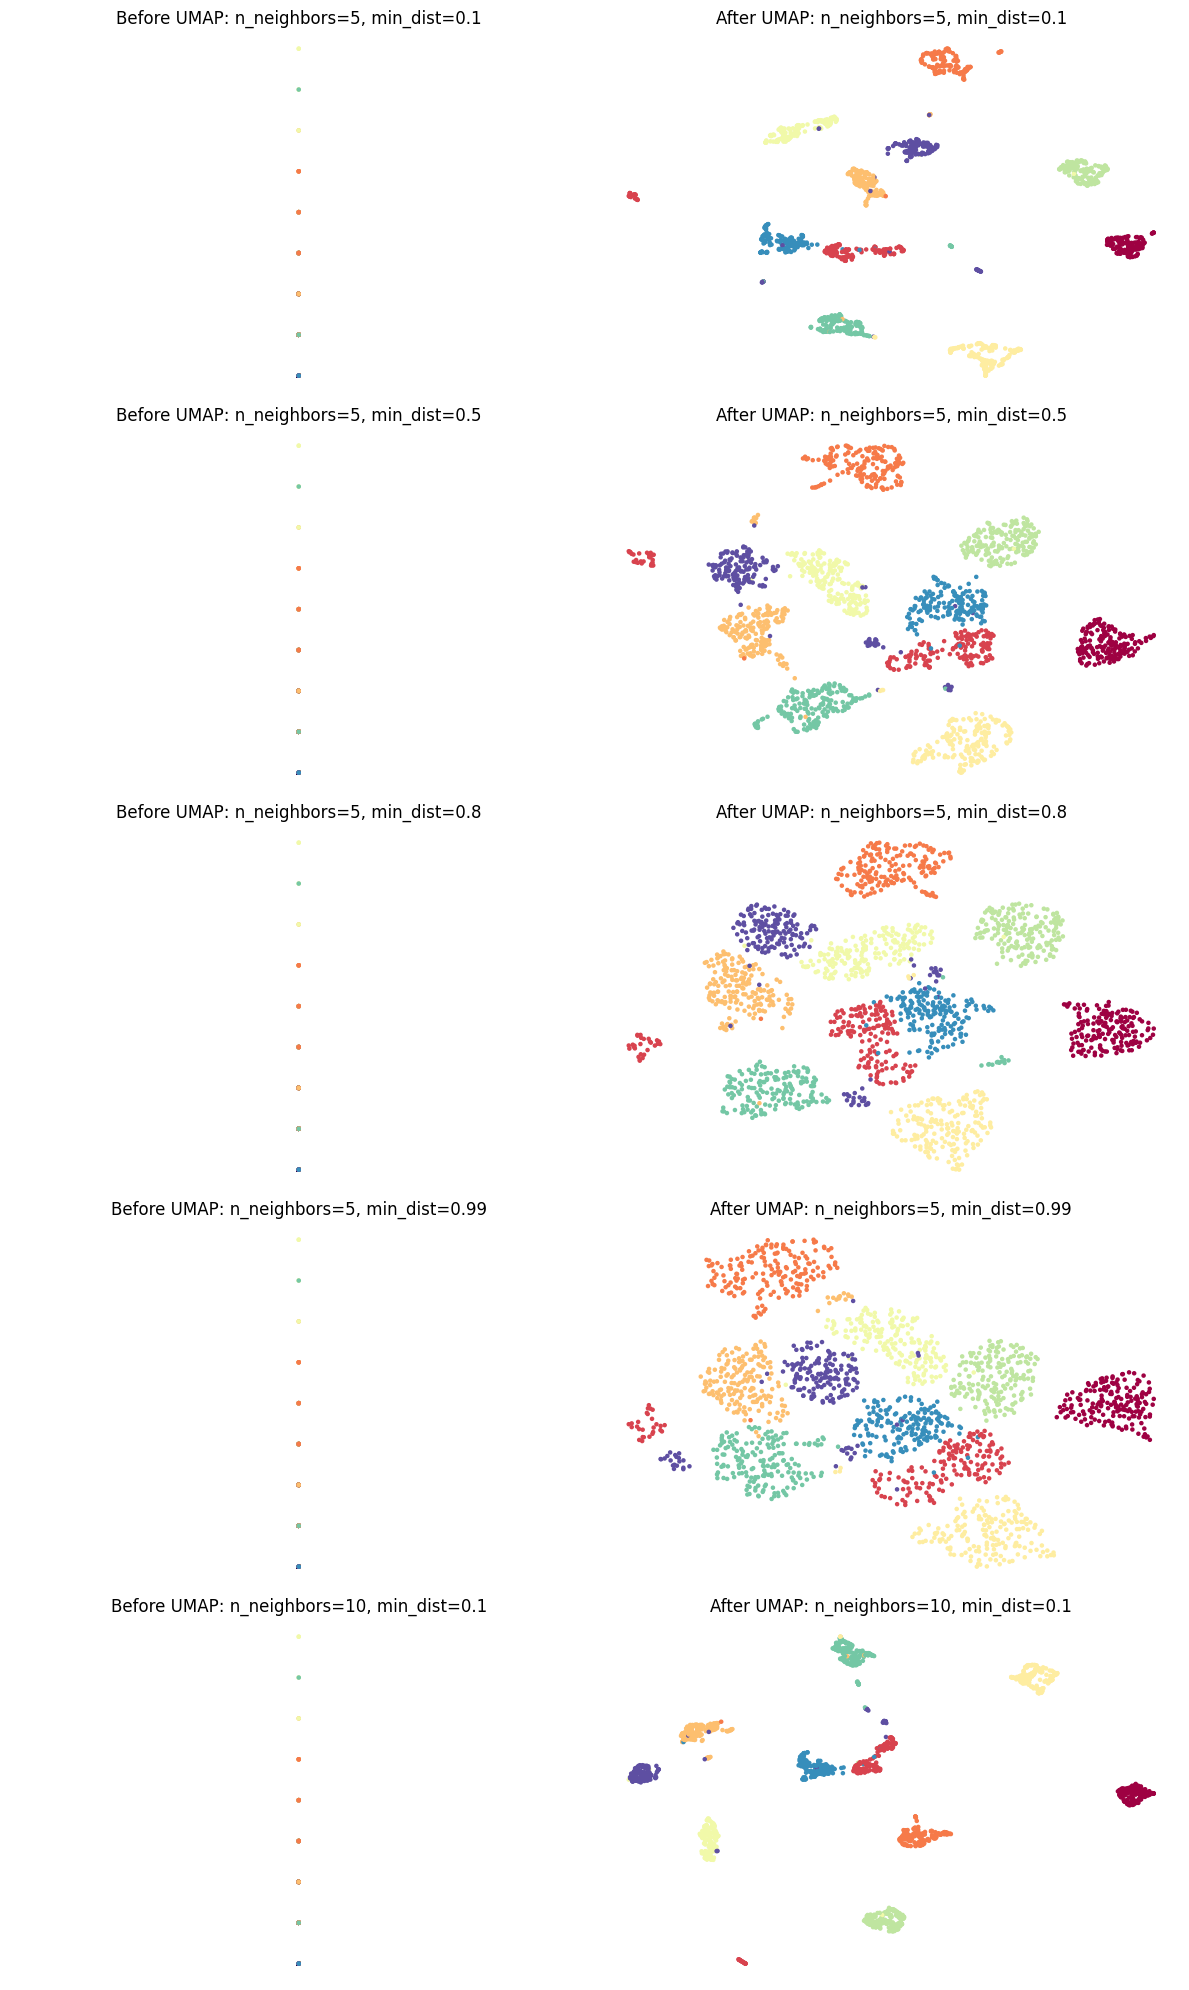

In [7]:
n_neighbors_values = [5, 10, 15, 20]
min_dist_values = [0.1, 0.5, 0.8, 0.99]

fig, axes = plt.subplots(5, 2, figsize=(12, 20))
axes = axes.ravel()
counter = 0

for n_neighbors in n_neighbors_values:
    for min_dist in min_dist_values:
        if counter >= 10:
            break
        # UMAP dimensionality reduction
        reducer = umap.UMAP(n_neighbors=n_neighbors, min_dist=min_dist)
        embedding = reducer.fit_transform(data)

        # Plotting the UMAP visualization before reduction
        axes[counter].scatter(data[:, 0], data[:, 1], c=target, cmap='Spectral', s=5)
        axes[counter].set_title(f'Before UMAP: n_neighbors={n_neighbors}, min_dist={min_dist}')
        axes[counter].axis('off')
        counter += 1

        # Plotting the UMAP visualization after reduction
        axes[counter].scatter(embedding[:, 0], embedding[:, 1], c=target, cmap='Spectral', s=5)
        axes[counter].set_title(f'After UMAP: n_neighbors={n_neighbors}, min_dist={min_dist}')
        axes[counter].axis('off')
        counter += 1

plt.tight_layout()
plt.show()
